In [1]:
import cv2
import numpy as np

from objtect import ObjectDetector
from tf_api import TFObjectDetectionAPI
from object_detection.utils import visualization_utils as vis_util

import matplotlib.pyplot as plt
import glob
%matplotlib inline


In [2]:

PATH_TO_TEST_IMAGES_DIR = './data/images/'
TEST_IMAGE_PATHS = glob.glob(PATH_TO_TEST_IMAGES_DIR+"/*.jpg")
print(TEST_IMAGE_PATHS)
IMAGE_SIZE = (12, 8)


['./data/images/people-walking-commercial-drive-landing.jpg']


<class 'numpy.ndarray'>


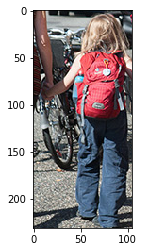

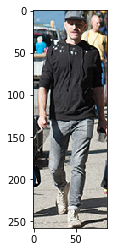

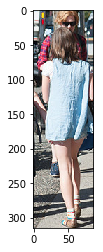

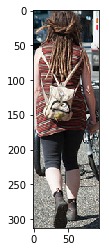

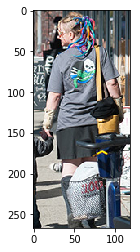

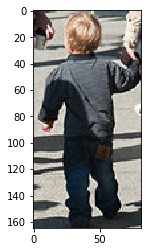

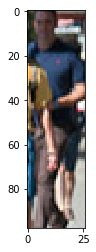

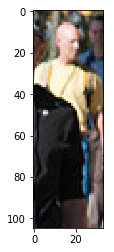

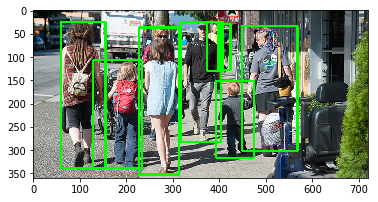

In [4]:
from matplotlib.patches import bbox_artist

from tf_api import PRETRAINED_faster_rcnn_inception_v2_coco_2018_01_28

detector = TFObjectDetectionAPI(PRETRAINED_faster_rcnn_inception_v2_coco_2018_01_28)
for image_path in TEST_IMAGE_PATHS:
    image = cv2.imread(image_path)
    decision = ObjectDetector(image, detector)
    img = image.copy()
    print(type(img))
    for i in range(decision.length()):
            inst_img = decision.getInstanceImage(i, types=['person'])
            if inst_img is not None:
                plt.imshow(cv2.cvtColor(inst_img, cv2.COLOR_BGR2RGB))
                plt.show()
        
    img = decision.getAnnotatedImage(types=['person'])            
    # plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()